<a href="https://colab.research.google.com/github/farah574/Tugas-Naive-Bayes/blob/main/4101422007_Farah_Adiba_UTS_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FARAH ADIBA (4101422007)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# 1. Eksplorasi awal
a. jumlah total penumbang dalam data

In [27]:
total_penumpang = data.shape[0]
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


b. Jumlah penumpang selamat dan tidak

Survived
0    549
1    342
Name: count, dtype: int64


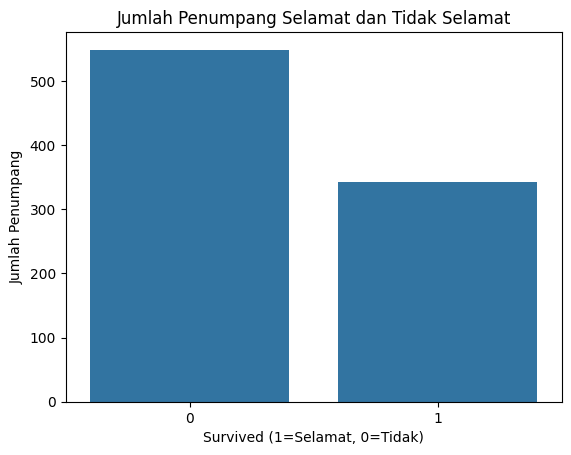

In [34]:
# Tabel
import seaborn as sns
import matplotlib.pyplot as plt
selamat_tidak = data['Survived'].value_counts()
print(selamat_tidak)

# Grafik
sns.countplot(x='Survived', data=data)
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xlabel('Survived (1=Selamat, 0=Tidak)')
plt.ylabel('Jumlah Penumpang')
plt.show()

Diperoleh bahwa penumpang yang selamat sebanyak 342 orang, sedangkan penumpang yang tidak selamat sebanyak 549

c. rata rata umur penumpang, dan siapa penumpang temuda dan tertua

In [36]:
# Rata-rata umur
rata2_umur = data['Age'].mean()
print(f"Rata-rata umur: {rata2_umur:.2f} tahun")

# Penumpang termuda
penumpang_termuda = data[data['Age'] == data['Age'].min()]
print("Penumpang termuda:")
print(penumpang_termuda[['Name', 'Age']])

# Penumpang tertua
penumpang_tertua = data[data['Age'] == data['Age'].max()]
print("Penumpang tertua:")
print(penumpang_tertua[['Name', 'Age']])


Rata-rata umur: 29.36 tahun
Penumpang termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42
Penumpang tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Diperoleh rata rata umur penumpang adalah 29,36 tahun
untuk penumpang termuda yaitu Thomas, Master. Assad Alexander dengan umur 0,42 tahun sedangkan untuk penumpang tertua adalah Barkworth, Mr. Algernon Henry Wilson  dengan umur 80 tahun

d. Jumlah penumpang berdasarkan jenis kelamin dan mana yang lebih banyak

Sex
male      577
female    314
Name: count, dtype: int64


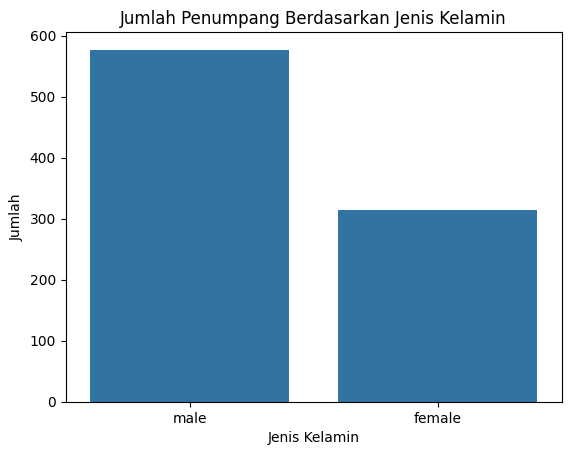

In [37]:
# Jumlah berdasarkan jenis kelamin
gender_count = data['Sex'].value_counts()
print(gender_count)

# Visualisasi
sns.countplot(x='Sex', data=data)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()


Diperoleh informasi bahwa penumpang laki-laki sebanyak 577 orang, sedangkan penumpang perempuan sebanyak 314 orang, jadi penumpang laki laki lebih banyak daripada penumpang perempuan.

e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? (visualisasi)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persen penumpang di kelas 1: 24.24%


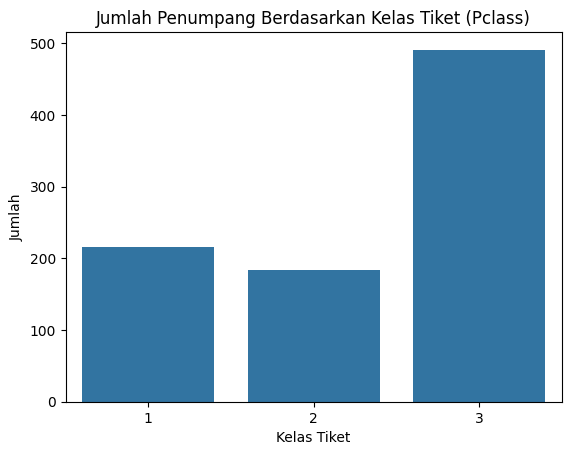

In [39]:
# Jumlah berdasarkan Pclass
kelas_count = data['Pclass'].value_counts()
print(kelas_count)

# Persen penumpang kelas 1
persen_kelas1 = (kelas_count[1] / total_penumpang) * 100
print(f"Persen penumpang di kelas 1: {persen_kelas1:.2f}%")

# Visualisasi
sns.countplot(x='Pclass', data=data)
plt.title('Jumlah Penumpang Berdasarkan Kelas Tiket (Pclass)')
plt.xlabel('Kelas Tiket')
plt.ylabel('Jumlah')
plt.show()


Berdasarkan data distribusi penumpang berdasarkan kelas (Pclass), diketahui bahwa:
* Sebagian besar penumpang berada di kelas 3, yaitu sebanyak 491 orang (sekitar 54,9% dari total penumpang).
* Penumpang di kelas 1 berjumlah 216 orang, yang mewakili sekitar 24,24% dari keseluruhan penumpang.
* Penumpang di kelas 2 sebanyak 184 orang, atau sekitar 20,6% dari total penumpang.

dan didapatkan 24,4% penumpang berada di kelas 1

# 2. Preprocessing

a. Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 12 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 891 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 891, diantaranya:

1.    Kolom 'Age' terdapat sebanyak 177 missing value
2.    Kolom 'Cabin' terdapat sebanyak 687 missing value
3.    Kolom 'Embarked' terdapat sebanyak 2 missing value



b. Handling missing value
1.   Asumsi untuk kolom 'Age', menggunakan imputasi median, karena distribusi Age biasanya tidak normal (banyak nilai yang lebih kecil dan beberapa outlier yang besar). Sehingga menggunakan median lebih robust karena tidak dipengaruhi oleh outlier, berbeda dengan mean (rata-rata) yang bisa tertarik oleh nilai ekstrem.
Median memberikan representasi pusat data yang lebih stabil untuk data skewed seperti umur
2.   Asumsi untuk kolom 'Cabin', menggunakan imputasi 'unknown', karena kolom 'Cabin' memiliki banyak sekali missing value sehingga sulit untuk mengimputasi dengan pendekatan numerik atau prediktif. Karena Cabin lebih menunjukkan kategori, mengisi dengan label 'Unknown' menjaga agar informasi tentang keberadaan atau ketidakadaan cabin tetap tercatat, tanpa membuat asumsi salah tentang nilai yang hilang
3. Asumsi untuk kolom 'Embarked', karena Kolom 'Embarked' berisi data kategori (S = Southampton, C = Cherbourg, Q = Queenstown) dan jumlah missing-nya sangat sedikit, mengisi dengan modus (nilai yang paling sering muncul) adalah pendekatan sederhana dan efektif. Hal ini mengurangi distorsi distribusi data embarkasi dan tetap mempertahankan konsistensi dataset.




# HANDLING MISSING VALUE

1. Kolom 'Age'

In [6]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [7]:
np.sum(data['Age'].isnull())

np.int64(177)

In [8]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [9]:
np.sum(data['Age'].isnull())

np.int64(0)

2. Kolom 'Cabin'

In [10]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
np.sum(data['Cabin'].isnull())

np.int64(687)

In [12]:
data['Cabin']=data['Cabin'].fillna('Unknown')

In [13]:
np.sum(data['Cabin'].isnull())

np.int64(0)

3. Kolom 'Embarked'

In [14]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
np.sum(data['Embarked'].isnull())

np.int64(2)

In [28]:
from scipy.stats import mode
data['Embarked'].mode()

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [29]:
np.sum(data['Embarked'].isnull())

np.int64(0)

In [30]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


c. Cek Outlier

Boxplot

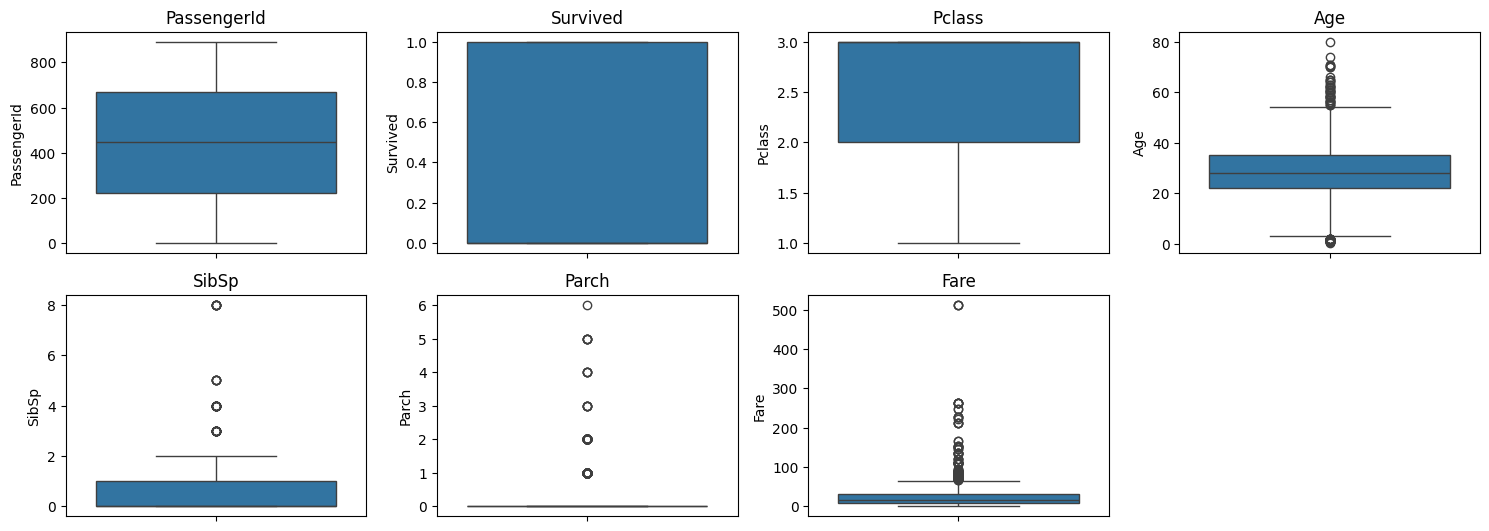

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

IQR

In [41]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Berdasarkan output tersebut, dapat dilihat bahwa:
1. Banyak output pada kolom Age adalah 66 outlier.
2. Banyak output pada kolom SibSp adalah 46 outlier
3. Banyak output pada kolom Parch adalah 213 outlier
4. Banyak output pada kolom Fare adalah 116 outlier

Outlier adalah data yang nilainya jauh melenceng dari mayoritas data lainnya, seolah-olah menjadi titik yang berbeda di antara kerumunan. Keberadaan outlier bisa berdampak besar terhadap analisis statistik maupun kinerja model machine learning, karena ia dapat mengubah rata-rata, memperlebar rentang, atau memaksa model untuk menyesuaikan diri terhadap sesuatu yang tidak mewakili pola umum. Outlier bisa muncul karena kesalahan pencatatan, seperti typo atau input data yang tidak akurat, namun tak jarang juga, outlier justru membawa cerita penting — mewakili kejadian langka, kelompok khusus, atau fenomena menarik yang layak dipelajari lebih dalam. Oleh karena itu, memahami dan menangani outlier dengan bijak menjadi bagian penting dalam proses analisis data.

d. outlier tersebut perlu diatasi dengan metode winzoring

In [42]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

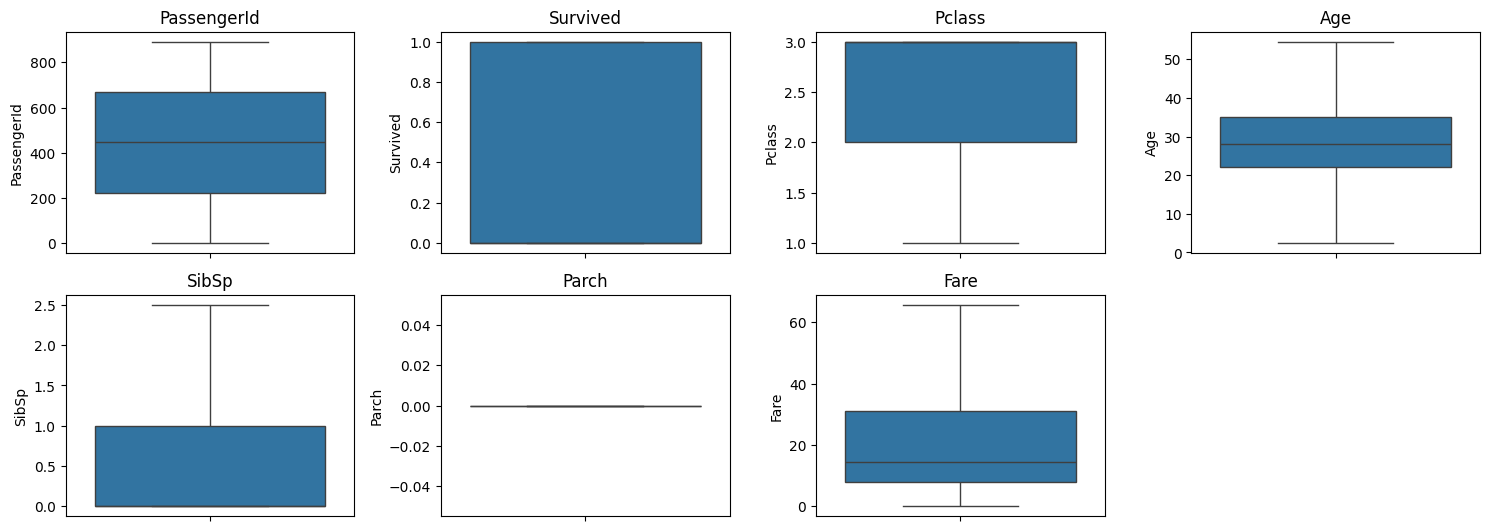

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [44]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


e. melakukan encoding dan scalling

* Encoding data numerik

In [51]:
data['Sex'].unique()

array([1, 0])

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
print(data['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


Male:1
Female:0

* Scalling data Numerik

In [55]:
from sklearn.preprocessing import StandardScaler

# Buat scaler
scaler = StandardScaler()

# Pilih kolom numerik
numerical_cols = ['Age', 'Fare']

# Fit dan transform
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Lihat hasil scaling
data[numerical_cols].head()

,Age,Fare
0,-0.583432,-0.820552
1,0.742685,2.031623
2,-0.251903,-0.787578
3,0.494038,1.419297
4,0.494038,-0.781471


# 3. Modelling

a. pembagian data menjadi dat atraining dan data testing

In [62]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Survived','Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y=data['Survived']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Jumlah data train: {len(X_train)}, Jumlah data test: {len(X_test)}")

Jumlah data train: 712, Jumlah data test: 179


Proses pembagian data menjadi data training dan testing dilakukan agar model machine learning dapat dilatih menggunakan sebagian data (training set) dan kemudian diuji performanya menggunakan data yang belum pernah dilihat sebelumnya (testing set).

Langkah-langkahnya biasanya:
1. Memisahkan dataset ke dalam dua bagian: sebagian besar untuk training (80%) dan sisanya untuk testing (20%).
2. Menggunakan fungsi seperti train_test_split dari library scikit-learn di Python untuk mempermudah pembagian.

Proses pembagian data menjadi data training dan testing dilakukan untuk memastikan bahwa model machine learning dapat belajar dari sebagian data (training set) dan diuji performanya pada data yang belum pernah dilihat sebelumnya (testing set). Pembagian ini penting untuk menghindari overfitting, yaitu kondisi ketika model terlalu hafal terhadap data latih namun gagal memprediksi data baru dengan baik. Dengan membagi data, kita bisa mengukur kemampuan generalisasi model secara objektif dan memastikan bahwa model dapat bekerja dengan baik pada data di dunia nyata.

b. Data dibagi dengan proporsi 80% untuk data training dan 20% untuk data testing. Pemilihan proporsi ini dilakukan karena 80% data yang lebih besar memungkinkan model untuk belajar lebih banyak pola dari data, sehingga meningkatkan kemampuan model dalam memahami hubungan antar variabel. Sementara itu, 20% data testing cukup untuk mengevaluasi kinerja model secara objektif tanpa mengurangi jumlah data yang dibutuhkan untuk pelatihan. Proporsi ini juga merupakan praktik umum dalam machine learning karena memberikan keseimbangan yang baik antara pelatihan model yang optimal dan evaluasi yang akurat.

c. klasifikasi 3 algoritma

In [75]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Misal X = fitur, y = label target
# Split data 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 2. K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 3. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


d. nilai evaluasi

In [76]:
# Evaluasi masing-masing model
print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("=== K-Nearest Neighbors ===")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

=== Decision Tree ===
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       105
         1.0       0.70      0.65      0.67        74

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.74      0.74      0.74       179

Accuracy: 0.7374301675977654
=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71       105
         1.0       0.55      0.31      0.40        74

    accuracy                           0.61       179
   macro avg       0.59      0.56      0.55       179
weighted avg       0.59      0.61      0.58       179

Accuracy: 0.6089385474860335
=== Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79   

1. Decision Tree Classifier
* Precision kelas 0: 76% → Dari semua yang diprediksi tidak selamat, 76% benar.
* Recall kelas 0: 80% → Dari semua yang benar-benar tidak selamat, 80% berhasil terprediksi.
* Precision kelas 1: 70% → Dari semua yang diprediksi selamat, 70% benar.
* Recall kelas 1: 65% → Dari semua yang benar-benar selamat, hanya 65% yang bisa dideteksi.
* Accuracy: 73.7% → Secara keseluruhan, model memprediksi dengan benar sekitar 73.7% data uji.

2. K-Nearest Neighbors (KNN) Classifier
* Precision kelas 0: 63% → Dari semua prediksi tidak selamat, 63% yang benar.
* Recall kelas 0: 82% → Dari semua yang benar-benar tidak selamat, 82% terdeteksi.
* Precision kelas 1: 55% → Dari semua prediksi selamat, 55% yang benar.
* Recall kelas 1: 31% → Dari semua orang yang benar-benar selamat, hanya 31% yang terdeteksi.
* Accuracy: 60.9% → Model hanya benar sekitar 60.9% dari total prediksi.

3. Logistic Regression
* Precision kelas 0: 81% → Dari semua prediksi tidak selamat, 81% benar.
* Recall kelas 0: 84% → Dari semua yang benar-benar tidak selamat, 84% berhasil dikenali.
* Precision kelas 1: 76% → Dari semua prediksi selamat, 76% benar.
* Recall kelas 1: 73% → Dari semua yang benar-benar selamat, 73% terdeteksi.
* Accuracy: 79.3% → Logistic Regression paling tinggi akurasinya dibandingkan dua model lain.

e. membandingkan hasil 3 algoritma

In [81]:
from sklearn.metrics import confusion_matrix

# Akurasi masing-masing model
akurasi_dt = accuracy_score(y_test, y_pred_dt)
akurasi_lr = accuracy_score(y_test, y_pred_lr)
akurasi_knn = accuracy_score(y_test, y_pred_knn)

print(f"Akurasi Decision Tree: {akurasi_dt:.4f}")
print(f"Akurasi Logistic Regression: {akurasi_lr:.4f}")
print(f"Akurasi KNN: {akurasi_knn:.4f}")

# Menentukan model terbaik
best_model_name = ''
if akurasi_lr > akurasi_dt and akurasi_lr > akurasi_knn:
    best_model_name = 'Logistic Regression'
    best_model_pred = y_pred_lr
elif akurasi_dt > akurasi_rf and akurasi_dt > akurasi_knn:
    best_model_name = 'Decision Tree'
    best_model_pred = y_pred_dt
else:
    best_model_name = 'KNN'
    best_model_pred = y_pred_knn

print(f"Model terbaik adalah: {best_model_name}")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Akurasi Decision Tree: 0.7374
Akurasi Logistic Regression: 0.7933
Akurasi KNN: 0.6089
Model terbaik adalah: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7932960893854749


Dari hasil evaluasi tiga model klasifikasi, diperoleh akurasi sebagai berikut:
* Akurasi Decision Tree = 73.74%
* Akurasi Logistic Regression = 79.33%
* Akurasi K-Nearest Neighbors (KNN) = 60.89%

Model terbaik adalah Logistic Regression karena memiliki akurasi tertinggi, yaitu 79.33% pada data testing.
Alasan mengapa Logistic Regression lebih baik:
1. Dataset kemungkinan memiliki hubungan linier antara fitur dan target, sehingga cocok dengan asumsi dasar Logistic Regression.
2. Logistic Regression lebih tahan terhadap overfitting dibandingkan Decision Tree yang cenderung membelah data terlalu spesifik.
3. KNN performanya kurang baik mungkin karena data memiliki banyak fitur atau distribusi jarak antar data kurang ideal untuk metode berbasis tetangga terdekat.

Dengan demikian, Logistic Regression lebih efektif karena mampu menangkap pola umum dari data tanpa terlalu sensitif terhadap variasi data kecil.

# 4. Evaluasi

Model terbaik adalah: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       105
         1.0       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.7932960893854749

Jumlah penumpang diprediksi selamat: 71
Jumlah yang benar-benar selamat dari prediksi tersebut: 54


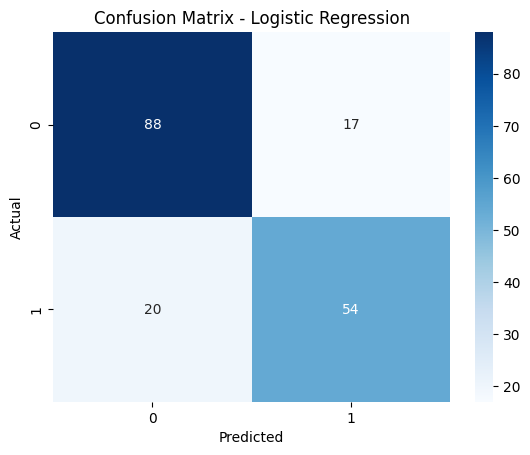

In [82]:
print(f"Model terbaik adalah: {best_model_name}")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
# Cek berapa banyak yang diprediksi selamat dan yang benar-benar selamat
predicted_selamat = (y_pred_lr == 1).sum()
benar_selamat = ((y_pred_lr == 1) & (y_test == 1)).sum()

print(f"\nJumlah penumpang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah yang benar-benar selamat dari prediksi tersebut: {benar_selamat}")

# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

a. Untuk prediksi penumpang yang "selamat" (kelas 1.0 di classification report):
* Precision = 0.76
* Recall = 0.73

Artinya, dari semua yang diprediksi selamat, 76% benar-benar selamat, dan dari semua penumpang yang memang selamat, 73% berhasil diprediksi dengan benar oleh model.

b. prediksi jumlah penumpang selamat
* Jumlah penumpang yang diprediksi selamat = 71 orang
* Jumlah yang benar-benar selamat dari prediksi tersebut = 54 orang

